In [23]:
import matplotlib.pyplot as plt
import numpy as np
import dataToVar as dat


In [24]:
def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

0.999487550952664
0.0007953364818785365 -0.03572710934178854 2.712884377525846


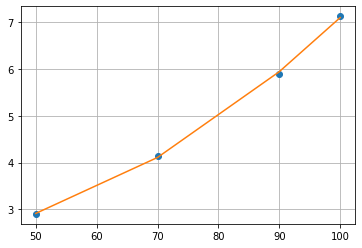

In [25]:
def r2surf(zlist,zlistfit):
    zlist = np.array(zlist)
    zlistfit = np.array(zlistfit)
    st = sum((zlist-np.average(zlist))**2)
    sr = sum((zlist-zlistfit)**2)
    r2 = 1-sr/st
    return r2

fif = dat.h50_noInsert
sev = dat.h70_noInsert
nin = dat.h90_noInsert
one = dat.h100_noInsert



a = 50 - np.average(fif[2][-50:])
b = 70 - np.average(sev[2][-50:])
c = 90 - np.average(nin[2][-50:])
d = 100 - np.average(one[2][-50:])
xx = np.array([50,70,90,100])
yy = np.array([a,b,c,d])
aa,bb,cc = np.polyfit(xx,yy,2)                              #offset coeffs
plt.plot(xx,yy,'o')
plt.plot(xx,aa*xx**2+bb*xx+cc)
plt.grid()

;
print(r2(yy,aa*xx**2+bb*xx+cc))
print(aa,bb,cc)
# print(fif[0][1])
# T = 105
# print(T-(aa*115**2+bb*115+cc))


In [26]:
rr = {}
# set = [50,70,90,100]

shortest = min(len(fif[1]),len(fif[2]),len(sev[1]),len(sev[2]),len(nin[1]),len(nin[2]),len(one[1]),len(one[2]))
ytot = [fif[2][:shortest],sev[2][:shortest],nin[2][:shortest],one[2][:shortest]]
timTot = [fif[0][:shortest],sev[0][:shortest],nin[0][:shortest],one[0][:shortest]]
xtot = [fif[1][:shortest],sev[1][:shortest],nin[1][:shortest],one[1][:shortest]]

# end = 600
# ytot = [fif[2][:end],sev[2][:end],nin[2][:end],one[2][:end]]
# xtot = [fif[1][:end],sev[1][:end],nin[1][:end],one[1][:end]]
for i in xtot:
    for j in range(len(i)):
        if str(i[j]) == 'nan':
            i[j] = i[j-1]


zlist = []
for i in ytot:
    for j in i:
        zlist.append(j)

big = np.arange(0.99,1,0.0001)
for i in big:
    zlistfit = []
    for j in range(len(ytot)):
        old = ytot[j][0]
        # ans = []
       
        count = 0
        for k in xtot[j]:
            if str(k) == 'nan':
                xtot[j][count] = xtot[j][count-1]
                # break
            else:
                offset = aa*k**2+bb*k+cc
                old = old*i+(k-offset)*(1-i)
                zlistfit.append(old)
            count+=1
        # print(len(zlistfit))

        

    r = r2surf(zlist,zlistfit)
    if r >.9 and r<1:
        rr[r] = i

# print(rr)
print('r2=',max(rr)) 
   
trust = rr[max(rr)] 
print('a=',trust)
# trust = .99802
# trust = .9957

r2= 0.9984533161143413
a= 0.998999999999999


''

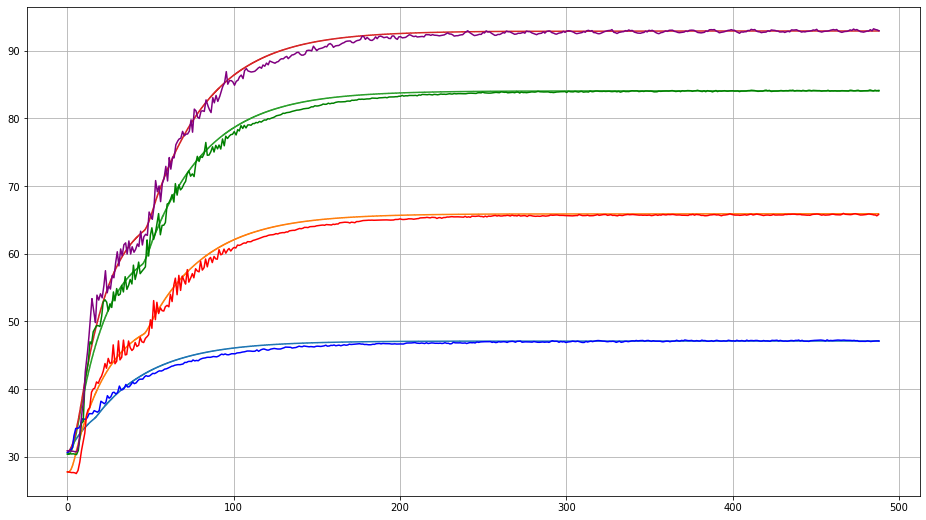

In [27]:
plt.figure(figsize=(16,9))
for j in range(len(ytot)):
    old = ytot[j][0]
    ans = []
 
    for k in xtot[j]:
        offset = aa*k**2+bb*k+cc
        old = old*trust+(k-offset)*(1-trust)
        ans.append(old)
    plt.plot(timTot[j],ans)
colors=['b','r','g','purple']
for i in range(len(ytot)):
    plt.plot(timTot[i],ytot[i],colors[i]) 
    # plt.plot(timTot[i],xtot[i],colors[i])
plt.grid()
# plt.yticks(np.arange(25,95,5))
;